In [212]:
import numpy as np
import pandas as pd


In [214]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [216]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5371,ham,"Lol, oh you got a friend for the dog ?",NaN,NaN,NaN
1791,ham,U havenåÕt lost me ill always b here 4u.i didn...,NaN,NaN,NaN
3276,ham,Its a great day. Do have yourself a beautiful ...,NaN,NaN,NaN
1663,ham,S but mostly not like that.,NaN,NaN,NaN
785,ham,"She was supposed to be but couldn't make it, s...",NaN,NaN,NaN


In [218]:
df.shape

(5572, 5)

## Data clening

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [223]:
df.drop(columns=['Unnamed: 2 ','Unnamed: 3','Unnamed: 4'],inplace=True,errors='ignore')

In [225]:
df.sample(5)

,v1,v2,Unnamed: 2
1531,ham,Oh dang! I didn't mean o send that to you! Lol!,NaN
600,ham,Mind blastin.. No more Tsunamis will occur fro...,NaN
2020,ham,Anything lor but toa payoh got place 2 walk me...,NaN
157,ham,"Hello, my love. What are you doing? Did you ge...",NaN
1456,ham,U sleeping now.. Or you going to take? Haha.. ...,NaN


In [227]:
df.drop(columns=['Unnamed:2'],inplace=True,errors='ignore')

In [229]:
df.sample(5)

,v1,v2,Unnamed: 2
2440,ham,"Great. I'm in church now, will holla when i ge...",NaN
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...,NaN
115,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN
975,ham,Hey no I ad a crap nite was borin without ya 2...,NaN
2767,ham,Wow v v impressed. Have funs shopping!,NaN


In [231]:
df.drop(df.columns[[2]],axis=1,inplace=True)

In [233]:
df.sample(5)

,v1,v2
2944,ham,"Hey babe, sorry i didn't get sooner. Gary can ..."
3347,ham,"Sorry, I'll call later"
1390,ham,"I wonder how you got online, my love ? Had you..."
1101,ham,"Yeah go on then, bored and depressed sittin wa..."
4647,ham,We are okay. Going to sleep now. Later


In [235]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [237]:
df.sample(5)

,target,text
1992,spam,Free tones Hope you enjoyed your new content. ...
59,ham,Yes..gauti and sehwag out of odi series.
1855,ham,K.:)you are the only girl waiting in reception...
2180,ham,Babe ! How goes that day ? What are you doing ...
3656,ham,Studying. But i.ll be free next weekend.


In [239]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [241]:
df['target'] = encoder.fit_transform(df['target'])

In [243]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [245]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [247]:
df.duplicated().sum()

403

In [249]:
df=df.drop_duplicates(keep='first')

In [251]:
df.duplicated().sum()

0

In [253]:
df.shape

(5169, 2)

## EDA

In [256]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [258]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

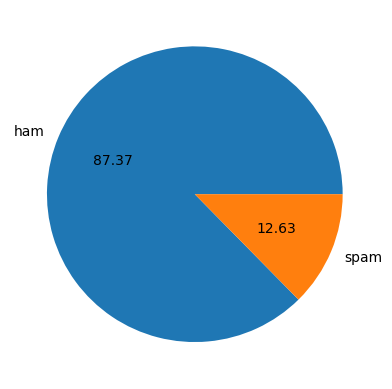

In [260]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [261]:
!pip install nltk

In [263]:
import nltk

In [264]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [265]:
df['num_characters']=df['text'].apply(len)

In [266]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [267]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [268]:
import nltk

In [269]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [270]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [271]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [272]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [273]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [274]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [275]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [276]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [277]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [278]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [279]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

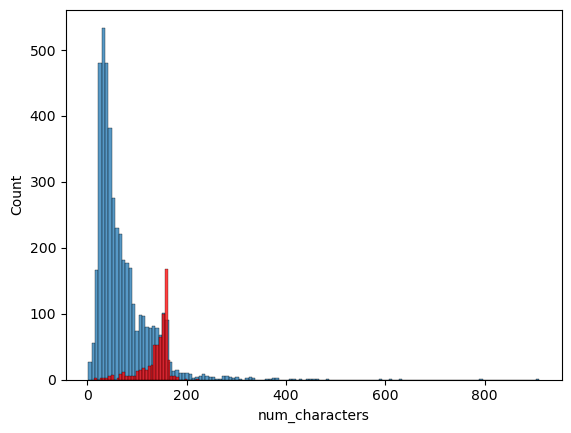

In [280]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

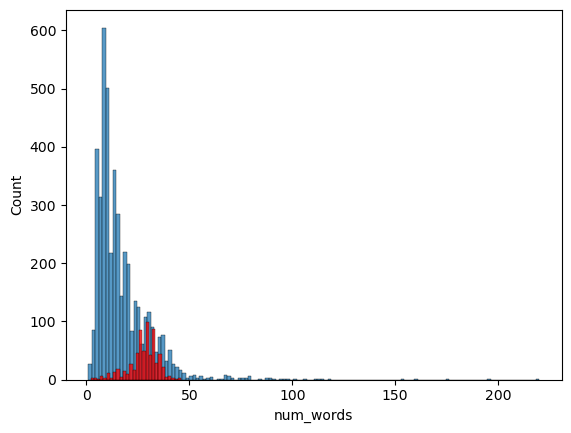

In [281]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

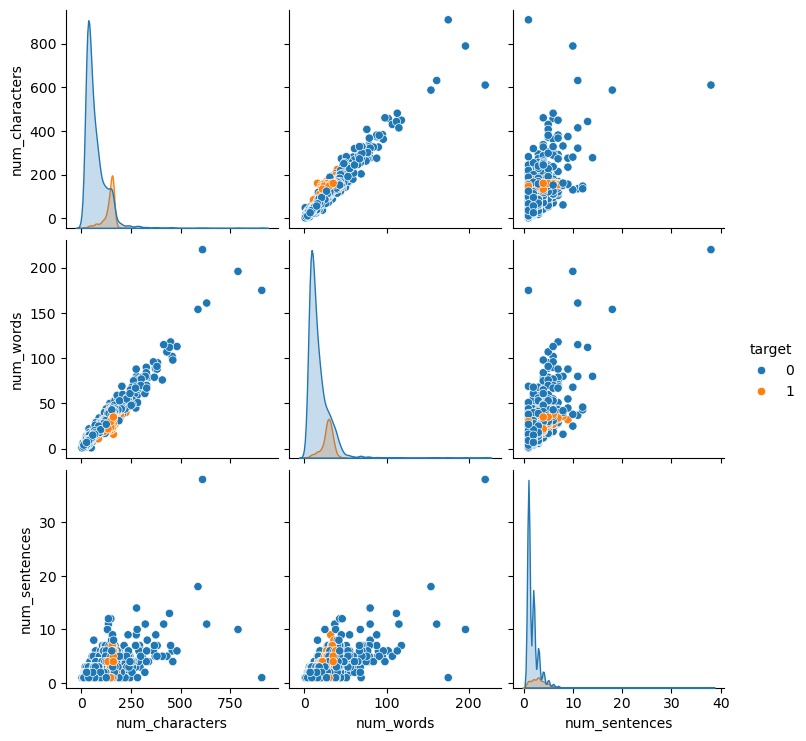

In [282]:
sns.pairplot(df,hue='target')

<Axes: >

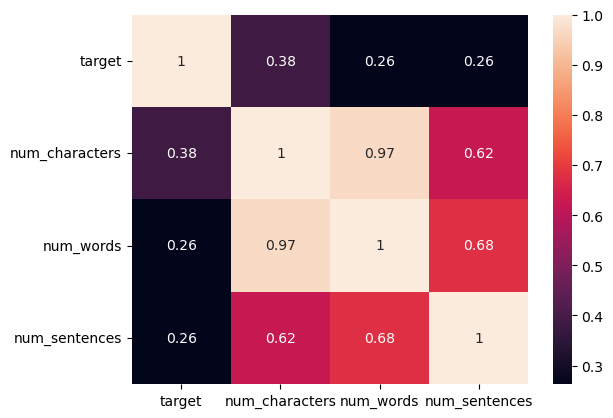

In [311]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## DATA PREPROCESSING

In [333]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [341]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [343]:
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return "  ".join(y)

In [345]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [347]:
transform_text('I loved the YT lectures on machine learning.How about you?')

'love  yt  lectur  machin'

In [349]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [351]:
df['transformed_text']=df['text'].apply(transform_text)

In [352]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [353]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [354]:
!pip install wordcloud

In [355]:
from wordcloud import WordCloud

In [356]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [357]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

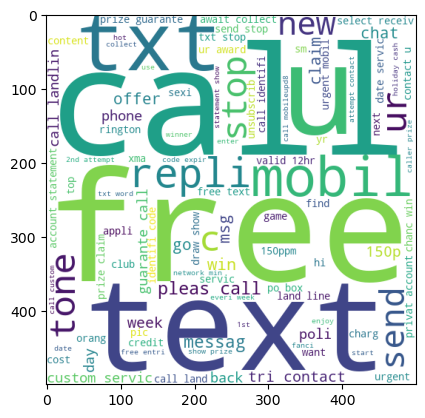

In [358]:
plt.imshow(spam_wc)

In [359]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

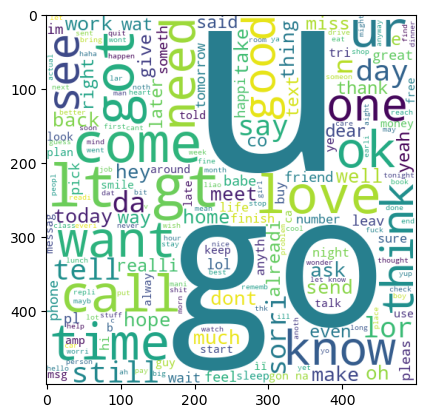

In [360]:
plt.imshow(ham_wc)

In [361]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [362]:
len(spam_corpus)

9939

In [363]:
from collections import Counter

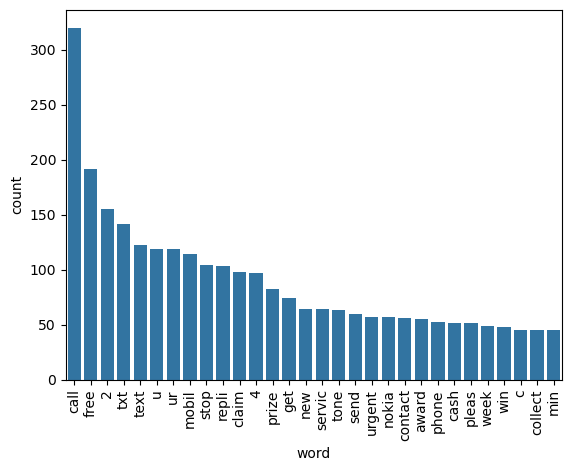

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

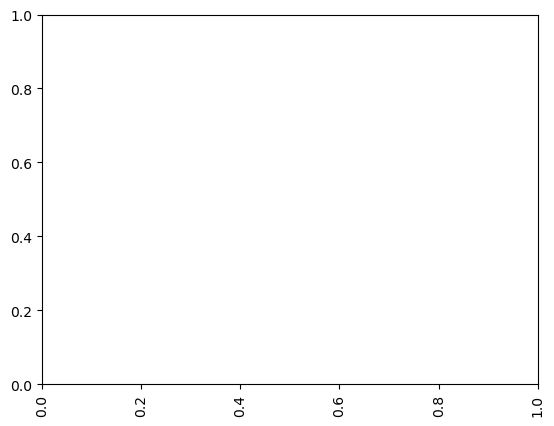

In [364]:
common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Correct usage of sns.barplot
sns.barplot(x=df_common['word'], y=df_common['count'])

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()


plt.xticks(rotation='vertical')

## MODEL BUILDING

In [459]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [461]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [463]:
print(df.columns)

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [465]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [467]:
X.shape

(5169, 6708)

In [469]:
y  = df['target'].values

In [471]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [473]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [475]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [477]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [479]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [481]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [483]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [485]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [487]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))